In [1]:

# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [2]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and target

# Standardize the features (important for Logistic Regression stability)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 455, Test samples: 114


In [ ]:
# Define Logistic Regression class
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Sigmoid activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Train the model
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        # Training loop
        for _ in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_output)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute loss (binary cross-entropy)
            loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
            self.loss_history.append(loss)

    # Make predictions
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)
        return np.where(y_pred >= 0.5, 1, 0)


In [4]:
# Train model
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg_scratch.fit(X_train, y_train)

# Predictions
y_pred_scratch = log_reg_scratch.predict(X_test)

# Evaluate performance
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch)
recall_scratch = recall_score(y_test, y_pred_scratch)
f1_scratch = f1_score(y_test, y_pred_scratch)

print(f"Custom Logistic Regression Accuracy: {accuracy_scratch:.4f}")
print(f"Precision: {precision_scratch:.4f}, Recall: {recall_scratch:.4f}, F1-Score: {f1_scratch:.4f}")


Custom Logistic Regression Accuracy: 0.9912
Precision: 0.9861, Recall: 1.0000, F1-Score: 0.9930


In [5]:
# Train scikit-learn's Logistic Regression
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)

# Predictions
y_pred_sklearn = log_reg_sklearn.predict(X_test)

# Evaluate performance
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print(f"Sklearn Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}, Recall: {recall_sklearn:.4f}, F1-Score: {f1_sklearn:.4f}")


Sklearn Logistic Regression Accuracy: 0.9737
Precision: 0.9722, Recall: 0.9859, F1-Score: 0.9790


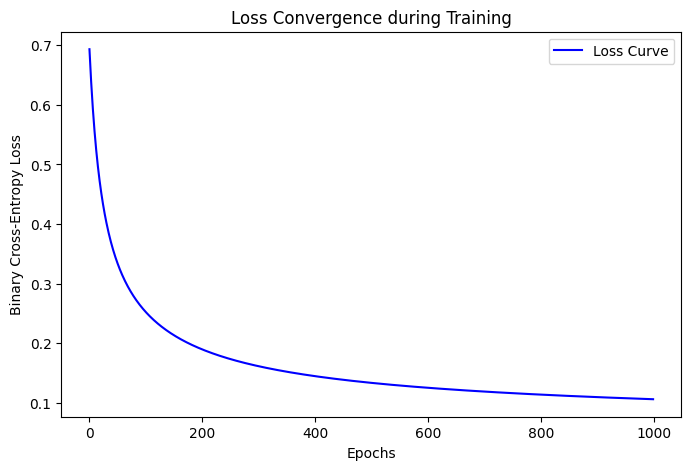

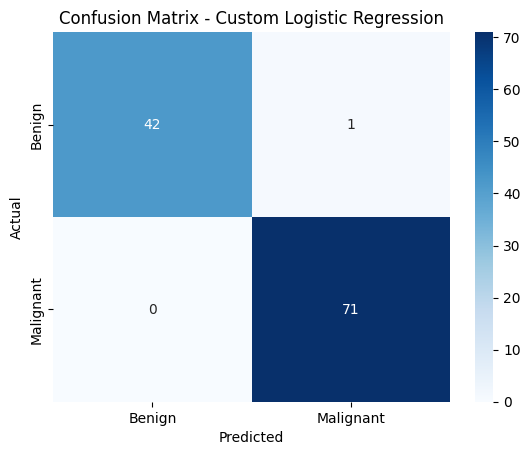

In [6]:
# Plot Loss Convergence
plt.figure(figsize=(8,5))
plt.plot(range(len(log_reg_scratch.loss_history)), log_reg_scratch.loss_history, label="Loss Curve", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss Convergence during Training")
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_scratch)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Custom Logistic Regression")
plt.show()
